In [93]:
!pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile('KIC 8462852', quarter = 16).download(quality_bitmask = 'hardest')

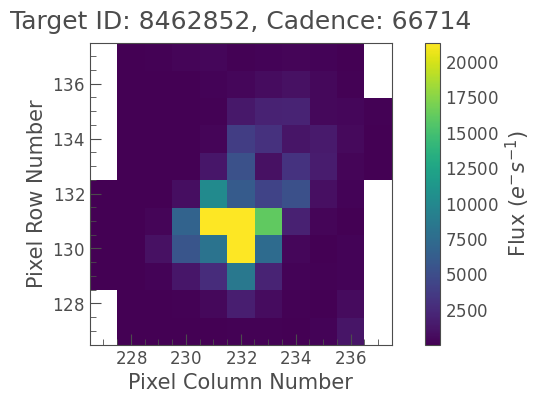

In [95]:
pixelfile.plot(frame=1)

In [96]:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [97]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

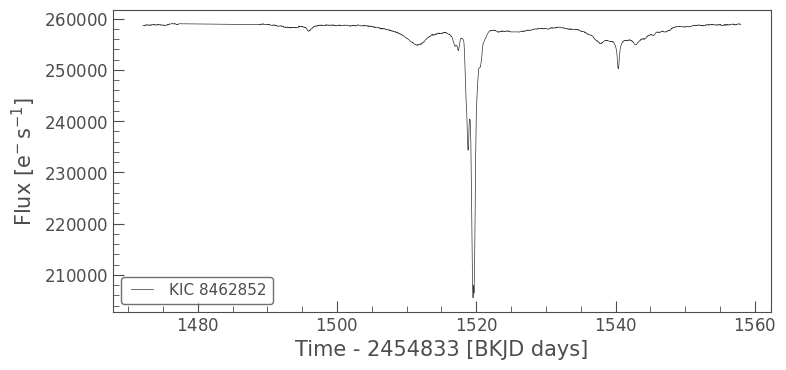

In [98]:
lc.plot()

In [99]:
pixelfile = search_targetpixelfile('KIC 6922244', quarter = 4).download()

/usr/local/lib/python3.8/dist-packages/lightkurve/search.py:407: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [100]:
lc = pixelfile.to_lightcurve(aperture_mask = pixelfile.pipeline_mask)

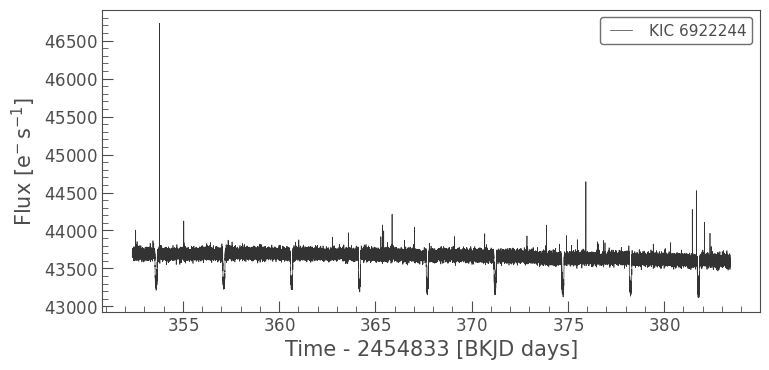

In [101]:
lc.plot()

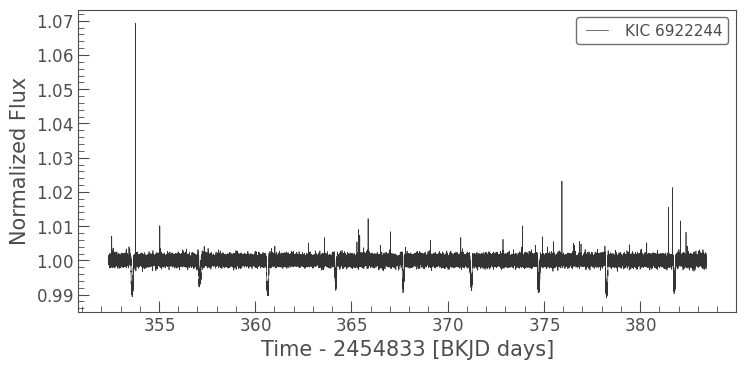

In [102]:
flat_lc = lc.flatten(window_length = 401)
flat_lc.plot()

In [103]:
import numpy as np
import astropy.units as u

<Quantity 3.522 d>

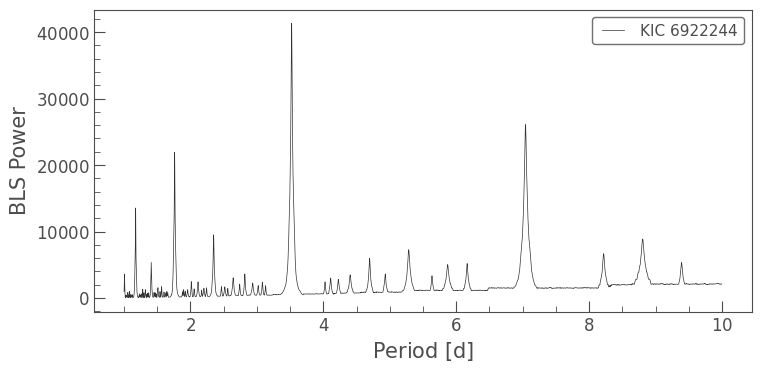

In [104]:
periodogram = flat_lc.to_periodogram(method="bls", period = np.arange(1, 10, 0.001))
periodogram.plot();
periodogram.period_at_max_power


In [105]:
best_fit_period = periodogram.period_at_max_power
print("The best fit period: {: 3f}".format(best_fit_period))

The best fit period:  3.522000 d


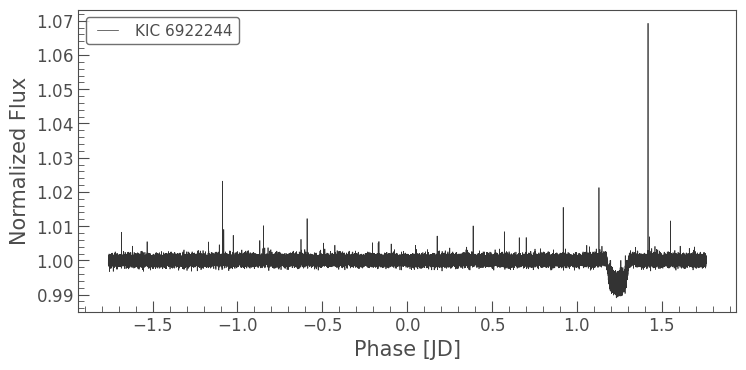

In [106]:
folded_lc = flat_lc.fold(period = best_fit_period)
folded_lc.plot()

<ipython-input-107-fdc18d6a72f7>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize = 100)


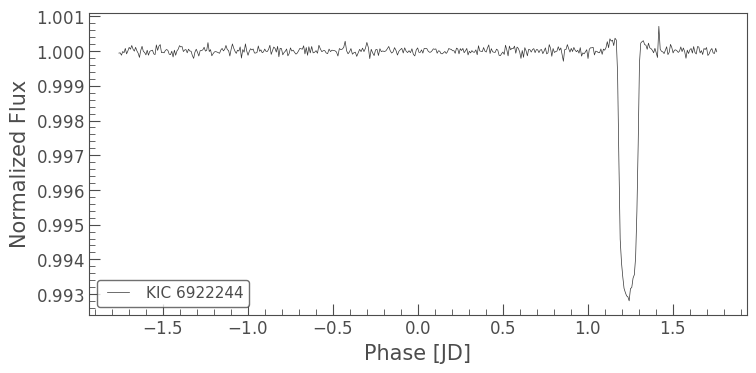

In [107]:
binned_lc = folded_lc.bin(binsize = 100)
binned_lc.plot()

<ipython-input-108-d26b76252689>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length = 401).fold(period = 3.522).bin(binsize= 100).plot()


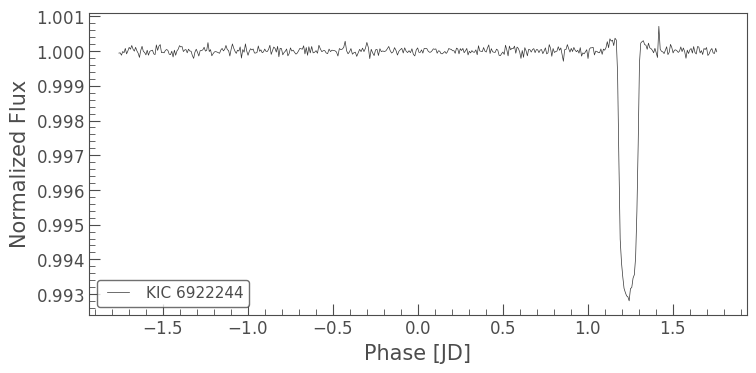

In [108]:
lc.remove_nans().flatten(window_length = 401).fold(period = 3.522).bin(binsize= 100).plot()

In [109]:
from lightkurve import search_targetpixelfile
import lightkurve as lk
search_result = lk.search_targetpixelfile('Pi Mensae', mission = 'TESS')

In [110]:
tpf = search_result.download(quality_bitmask='default')

/usr/local/lib/python3.8/dist-packages/lightkurve/search.py:407: LightkurveWarning: Warning: 30 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


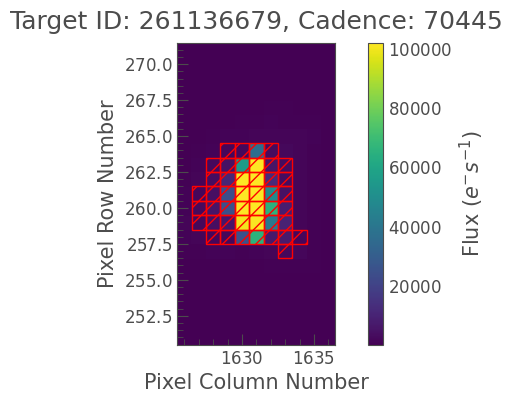

In [111]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

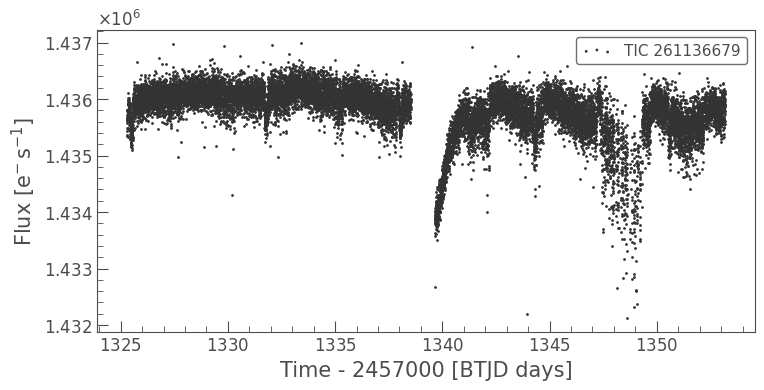

In [112]:
lc = tpf.to_lightcurve()
# lc.plot()
lc.scatter()

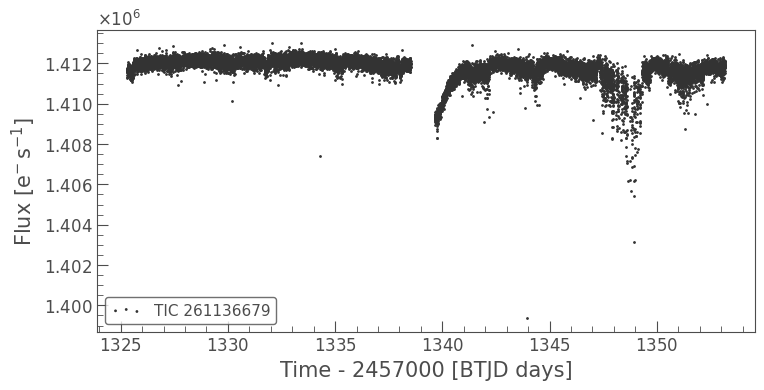

In [113]:
aperture_mask = tpf.create_threshold_mask(threshold = 10)
lc = tpf.to_lightcurve(aperture_mask = aperture_mask)
lc.scatter()

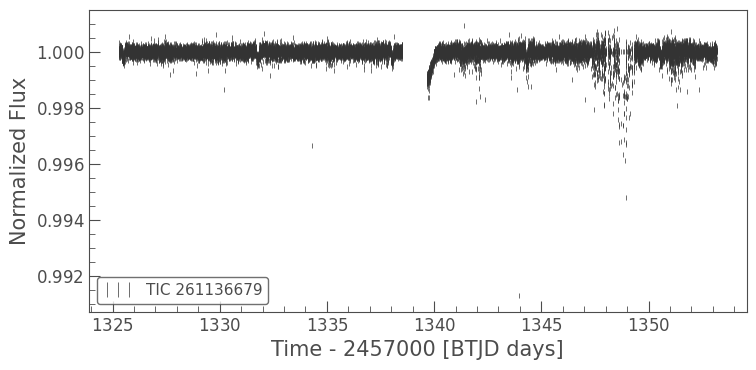

In [114]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()

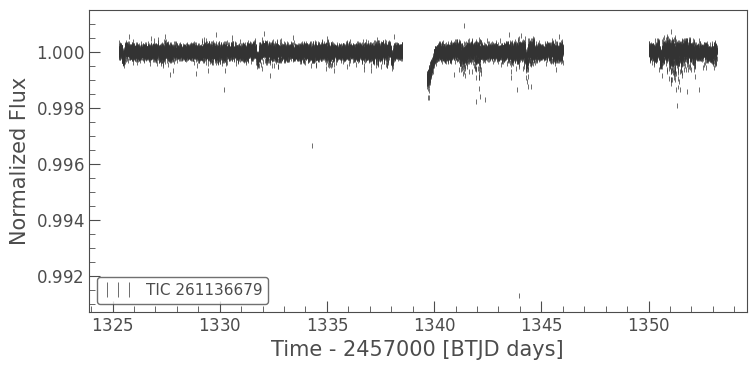

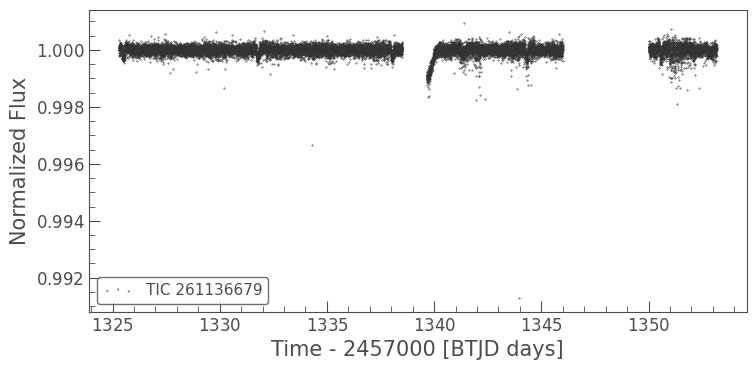

In [115]:
# x = flat_lc.time
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.errorbar()
masked_lc.scatter(s=0.5)

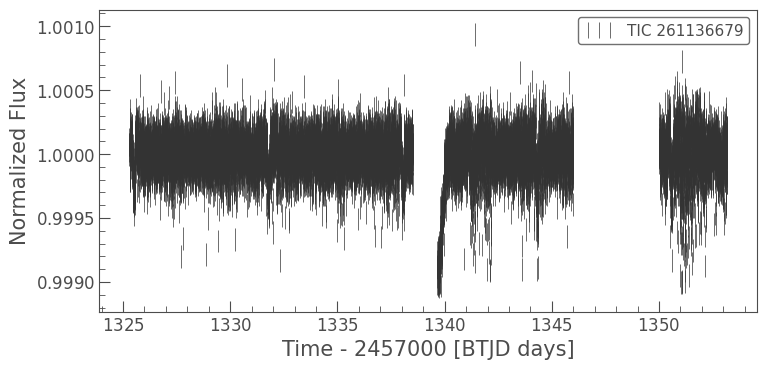

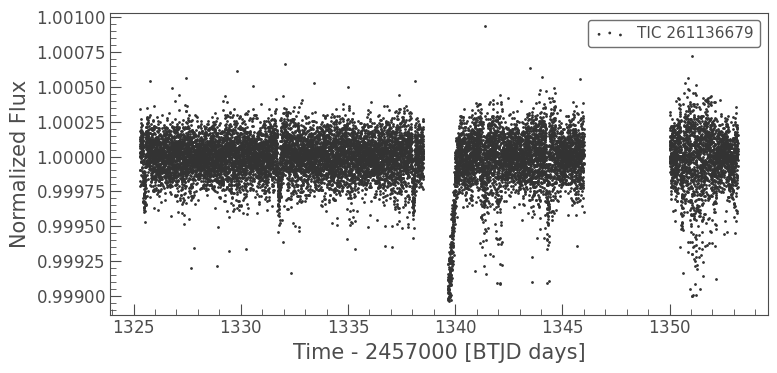

In [116]:
clipped_lc = masked_lc.remove_outliers(sigma = 6)
clipped_lc.errorbar()
clipped_lc.scatter()

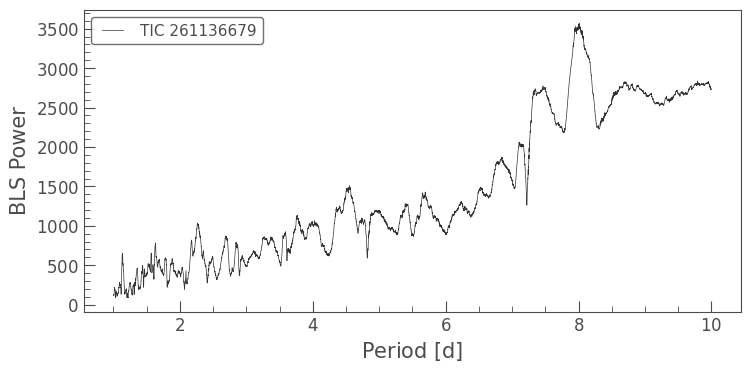

In [117]:
periodogram1 = clipped_lc.to_periodogram(method = 'bls', period = np.arange(1, 10, 0.001))
periodogram1.plot()

In [118]:
best_fit_period = periodogram1.period_at_max_power
print("best_fit_period: {:.3f}".format(best_fit_period))

best_fit_period: 8.010 d


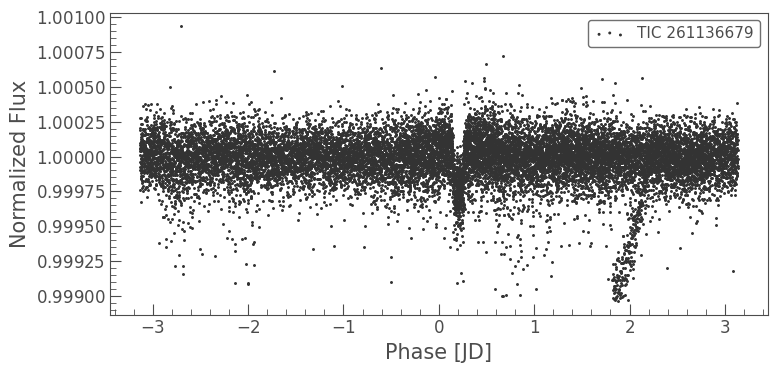

In [119]:
# folded_lc = clipped_lc.fold(period = 8.010)
folded_lc = clipped_lc.fold(period = 6.27)
folded_lc.scatter(s = 5)
# folded_lc.plot()

<ipython-input-120-9f8088adb67d>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


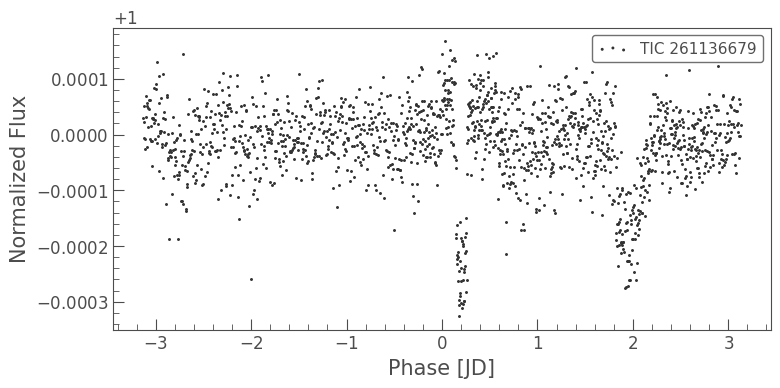

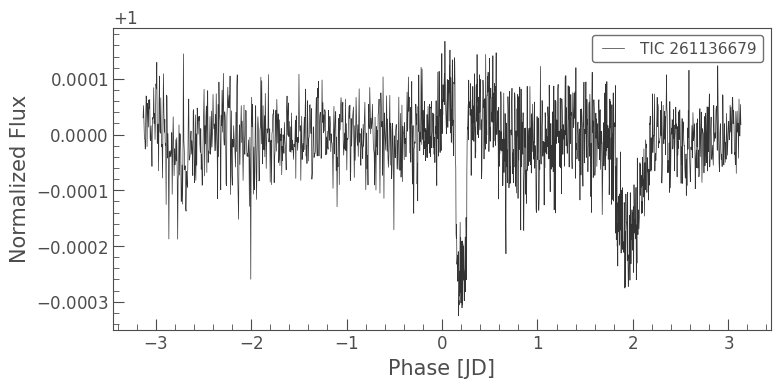

In [120]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.scatter(s=5)
binned_lc.plot()

Detection and analysing of star TIC419012256 from TESS Dataset file 1

In [121]:
from lightkurve import TessLightCurveFile, TessTargetPixelFile
tpf = TessTargetPixelFile("/content/drive/MyDrive/Exoplanet Detection/MAST_2023-01-31T0332/MAST_2023-01-31T0332/TESS/tess2018234235059-s0002-0000000419012256-0121-s/tess2018234235059-s0002-0000000419012256-0121-s_tp.fits")
lc = TessLightCurveFile("/content/drive/MyDrive/Exoplanet Detection/MAST_2023-01-31T0332/MAST_2023-01-31T0332/TESS/tess2018234235059-s0002-0000000419012256-0121-s/tess2018234235059-s0002-0000000419012256-0121-s_lc.fits")
tpf

TessTargetPixelFile(TICID: 419012256)

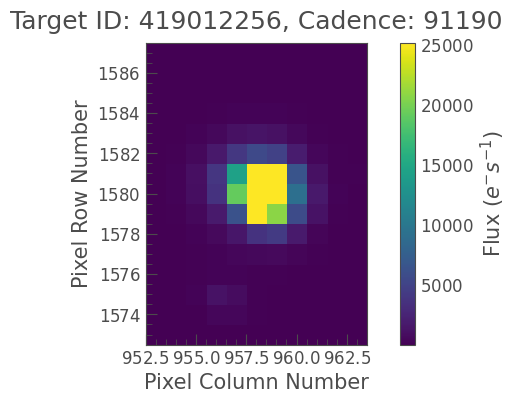

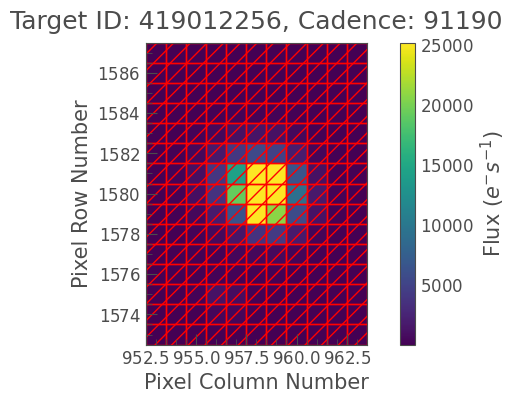

In [122]:
tpf.plot()
tpf.plot(aperture_mask = tpf.pipeline_mask)

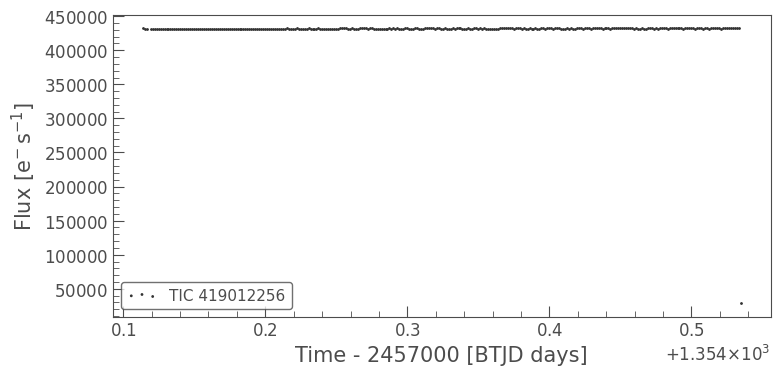

In [123]:
lc = tpf.to_lightcurve()
lc.scatter()
# lc_curve = lc.scatter(s = 10)
# lc_curve.set_ylim(430000, 433000)
# lc_curve.set_xlim(0.1, 10)

(0.97, 1.2)

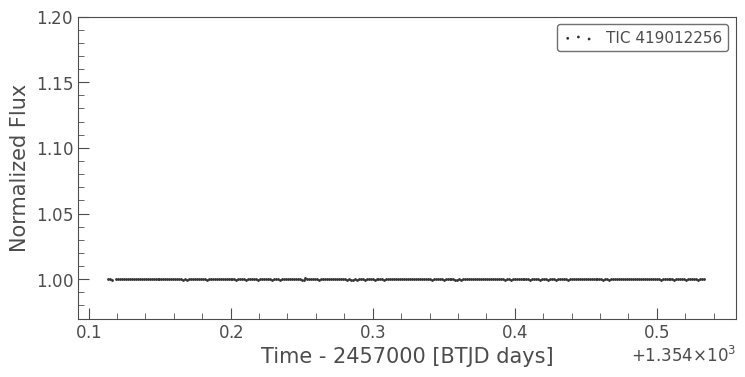

In [126]:
flat_lc = lc.flatten()
flat_lc.scatter().set_ylim(0.97, 1.2)

/usr/local/lib/python3.8/dist-packages/astropy/timeseries/periodograms/bls/core.py:327: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.ascontiguousarray(strip_units(self.dy), dtype=np.float64) ** 2


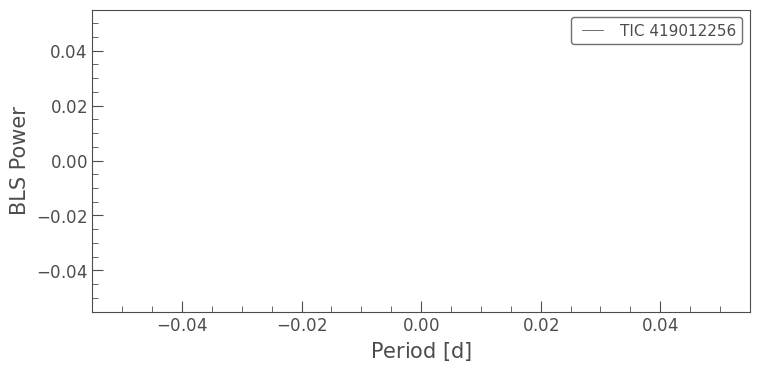

In [130]:
import numpy as np
periodogram = flat_lc.to_periodogram(method = 'bls', period = np.arange(1, 10, 0.001))
periodogram.plot()

In [131]:
best_fit_period = periodogram.period_at_max_power
print("Best fit period: {:.3f}".format(best_fit_period))

Best fit period: 1.000 d


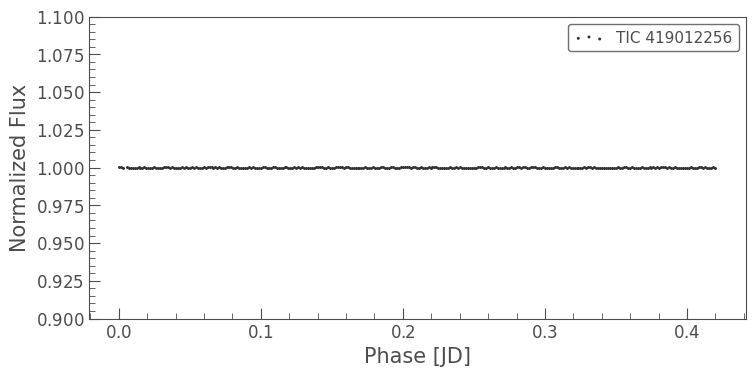

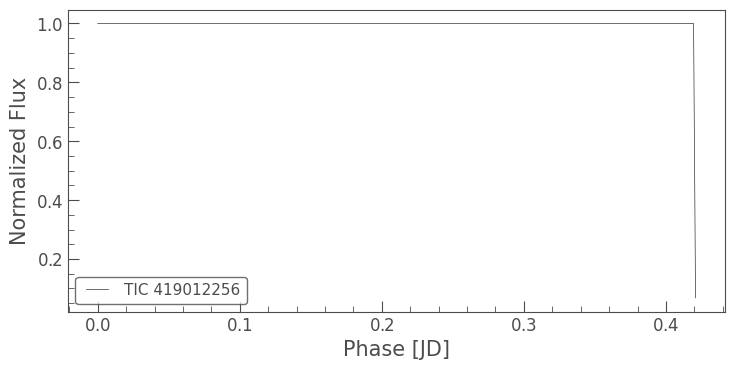

In [136]:
folded_lc = flat_lc.fold(period = 1.000)
folded_lc.scatter(s = 5).set_ylim(0.9, 1.1)